## Titanic - Machine Learning from Diaster




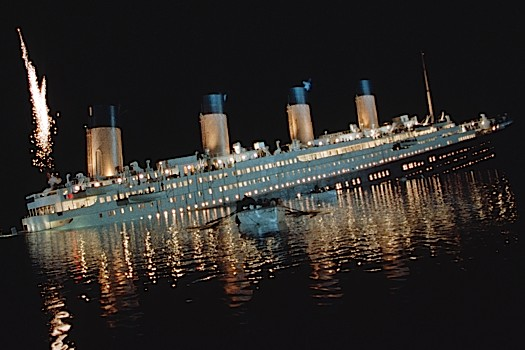





Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


**What particularly we need do in this challenge ?**

In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy?.

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
titanic_df = pd.read_csv('C:\\Users\\Workstation\\OneDrive\\Desktop\Data Science_Material\\Data Science with Python\\Kaggle Competitions\\Titanic\\train.csv',index_col = 0)

In [3]:
titanic_test1 = pd.read_csv('C:\\Users\\Workstation\\OneDrive\\Desktop\\Data Science_Material\\Data Science with Python\\Kaggle Competitions\\Titanic\\test.csv',index_col = 0)

In [4]:
titanic_test1.shape

(418, 10)

In [5]:
plt.style.use('classic')

In [6]:
titanic_df.shape

(891, 11)

In [7]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Dataset

The data has been split into two groups:

training set (train.csv)
test set(test.csv)
The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.

The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.


**Lets describe whats the meaning of the features given the both train & test datasets.**

Variable Definition Key:

**Survival**
- 0= No
- 1= Yes

**pclass (Ticket class)**
- 1=1st
- 2=2nd
- 3=3rd

**sex**
**age** (age in years)
**sibsp** (# of siblings / spouses aboard the Titanic)
**parch** (# of parents / children aboard the Titanic)
**ticket**
**fare**
**cabin**

**embarked (Port of Embarkation)**
- C = Cherbourg,
- Q = Queenstown,
- S = Southampton

## Exploratory Data Analysis

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Different variables present in the datasets.
**There are four type of variables**

- Numerical Features: Age, Fare, SibSp and Parch
- Categorical Features: Sex, Embarked, Survived and Pclass
- Alphanumeric Features: Ticket and Cabin(Contains both alphabets and the numeric value)
Text Features: Name
We really need to tweak these features so we get the desired form of input data

In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering 

'Name','Ticket','Cabin' columns are irrelavant for predicting survivability. 
And as you recall, the cabin variable is almost all missing values,so we can just drop all of these.

In [10]:
titanic_df = titanic_df.drop(['Name','Ticket','Cabin'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Missing Values

In [11]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
#percentage of missing values
(titanic_df.isnull().sum() / titanic_df.shape[0])*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

- Age is a relevant predictor for survival but it has 177 missing values, Need to deal with the missing values in the age variable.
- There are 2 null values in the embarked variable. We can drop those 2 records without loosing too much important information from our dataset, so we will do that.

In [13]:
def age_approx(cols):
    Age    = cols[3]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return int(titanic_df[titanic_df['Pclass']== 1]['Age'].mean())
        elif Pclass == 2:
            return int(titanic_df[titanic_df['Pclass']== 2]['Age'].mean())
        else:
            return int(titanic_df[titanic_df['Pclass']== 3]['Age'].mean())
    else:
        return Age

In [14]:
titanic_df['Age'] = titanic_df.apply(age_approx, axis=1)
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [15]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Univariate Analysis

In [16]:
titanic_df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [17]:
(titanic_df['Survived'].value_counts()/titanic_df.shape[0])*100

0    61.754781
1    38.245219
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survived')

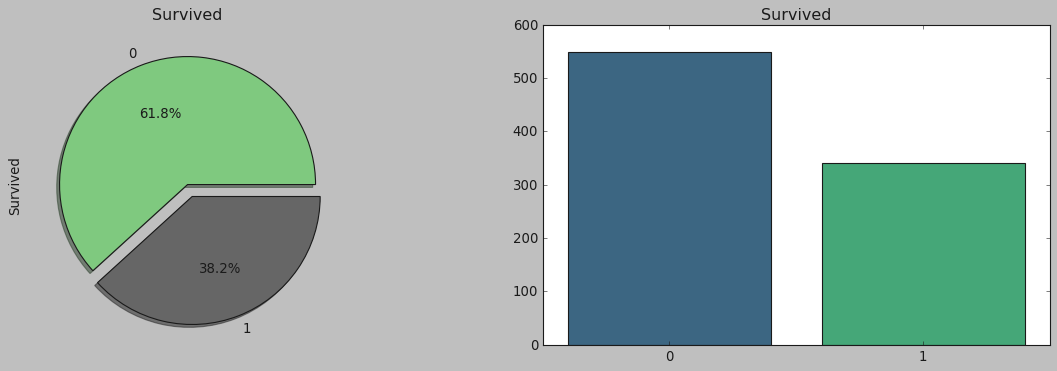

In [18]:
f,ax = plt.subplots(1,2,figsize=(18,5))
titanic_df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',
                                         shadow=True,
                                         colormap = 'Accent',
                                         ax = ax[0])
ax[0].set_title('Survived')

### second plot
sns.barplot(titanic_df['Survived'].value_counts().index,titanic_df['Survived'].value_counts().values,palette='viridis')
ax[1].set_title('Survived')


In [19]:
titanic_df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [20]:
(titanic_df['Sex'].value_counts()/titanic_df.shape[0])*100

male      64.904387
female    35.095613
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Male vs Female')

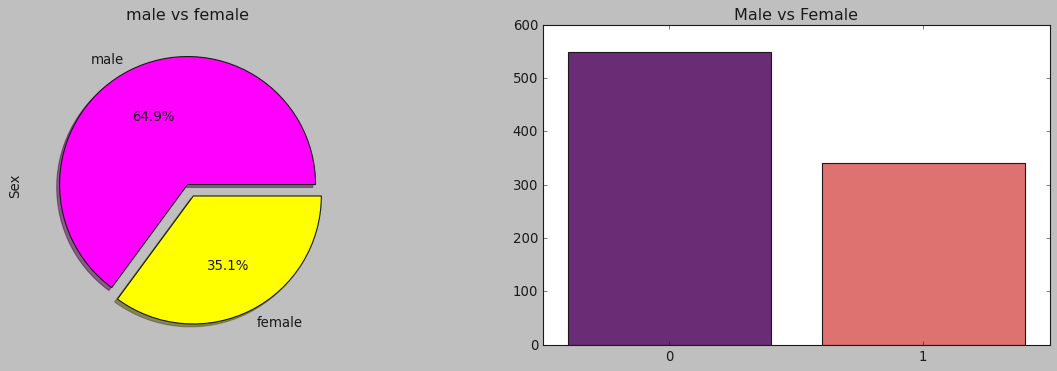

In [21]:
f,ax = plt.subplots(1,2,figsize=(18,5))
## First Plot
titanic_df['Sex'].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',
                                         shadow=True,
                                         colormap = 'spring',
                                         ax = ax[0])
ax[0].set_title('male vs female')

### second plot
sns.barplot(titanic_df['Survived'].value_counts().index,titanic_df['Survived'].value_counts().values,palette='magma')
ax[1].set_title('Male vs Female')


In [22]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
(titanic_df['Embarked'].value_counts()/titanic_df.shape[0])*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

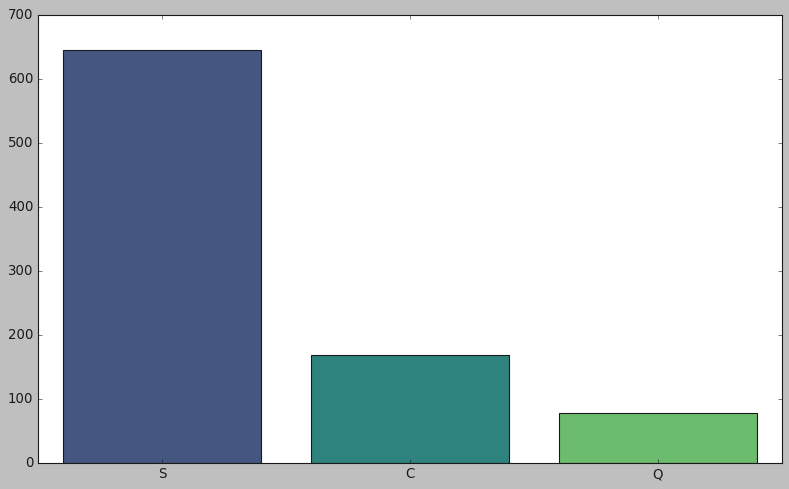

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(titanic_df['Embarked'].value_counts().index,titanic_df['Embarked'].value_counts()[:10].values,palette='viridis')
plt.show()

## Bivariate Analysis

In [25]:
pd.crosstab(titanic_df.Sex, titanic_df.Survived)

Survived,0,1
Sex,,
female,81,231
male,468,109


In [26]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

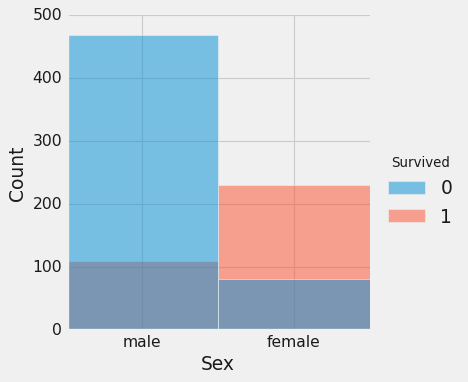

In [27]:
from matplotlib import style
style.use('fivethirtyeight')
sns.displot(data = titanic_df, x = 'Sex', hue = 'Survived')

In [28]:
titanic_df.groupby('Age')['Survived'].sum()

Age
0     7
1     5
2     3
3     5
4     7
     ..
66    0
70    0
71    0
74    0
80    1
Name: Survived, Length: 71, dtype: int64

Text(0.5, 1.0, 'Age v/s Survived')

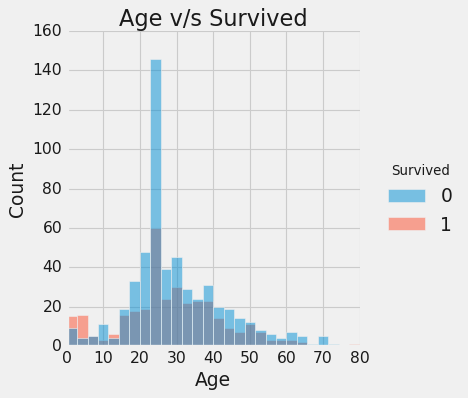

In [29]:
sns.displot(data = titanic_df, x = 'Age', hue = 'Survived')
plt.title('Age v/s Survived')

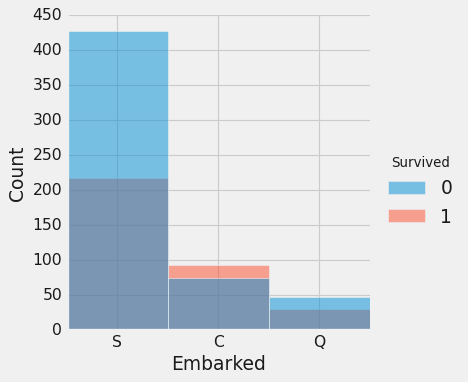

In [30]:
sns.displot(data = titanic_df, x = 'Embarked', hue = 'Survived',  discrete = True)

In [31]:
titanic_df.groupby('Fare')['Survived'].sum()

Fare
0.0000      1
4.0125      0
5.0000      0
6.2375      0
6.4375      0
           ..
227.5250    3
247.5208    1
262.3750    2
263.0000    2
512.3292    3
Name: Survived, Length: 247, dtype: int64

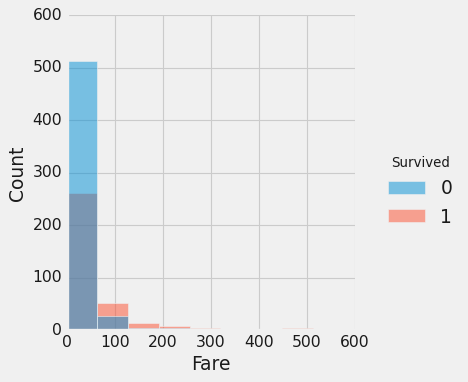

In [32]:
sns.displot(data = titanic_df, x = 'Fare', hue = 'Survived', bins = 8)

In [33]:
pd.crosstab(titanic_df.Pclass ,titanic_df.Survived).style.background_gradient(cmap='Pastel1_r')

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


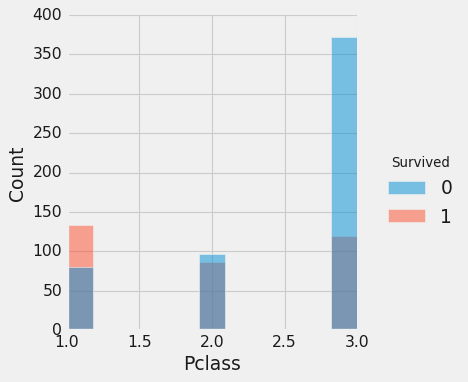

In [34]:
sns.displot(data = titanic_df, x = 'Pclass', hue = 'Survived')

In [35]:
titanic_df.groupby('Pclass')['Survived']
pd.crosstab([titanic_df.Sex,titanic_df.Pclass],titanic_df.Survived, margins = True)

Survived         0    1  All
Sex    Pclass               
female 1         3   89   92
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  340  889

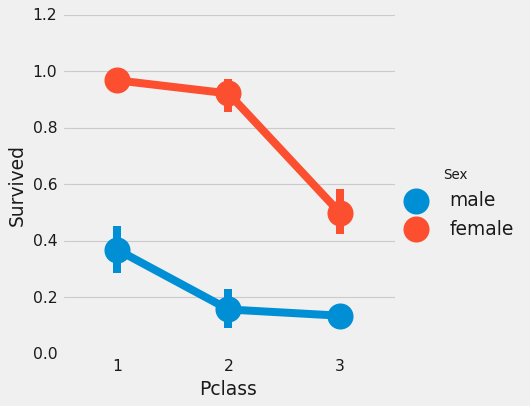

In [36]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df)
#plt.savefig(path on machine.png)

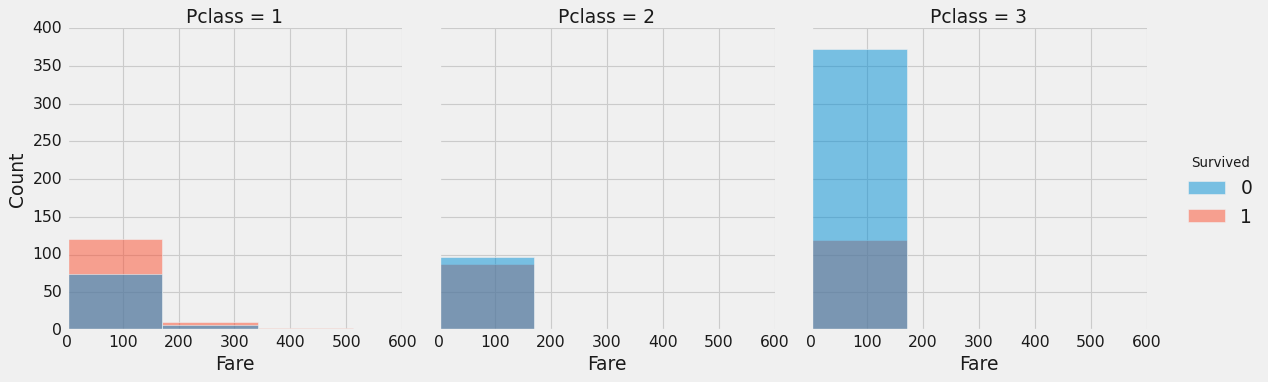

In [37]:
sns.displot(data = titanic_df, x = 'Fare', col = 'Pclass', bins = 3, hue = 'Survived')

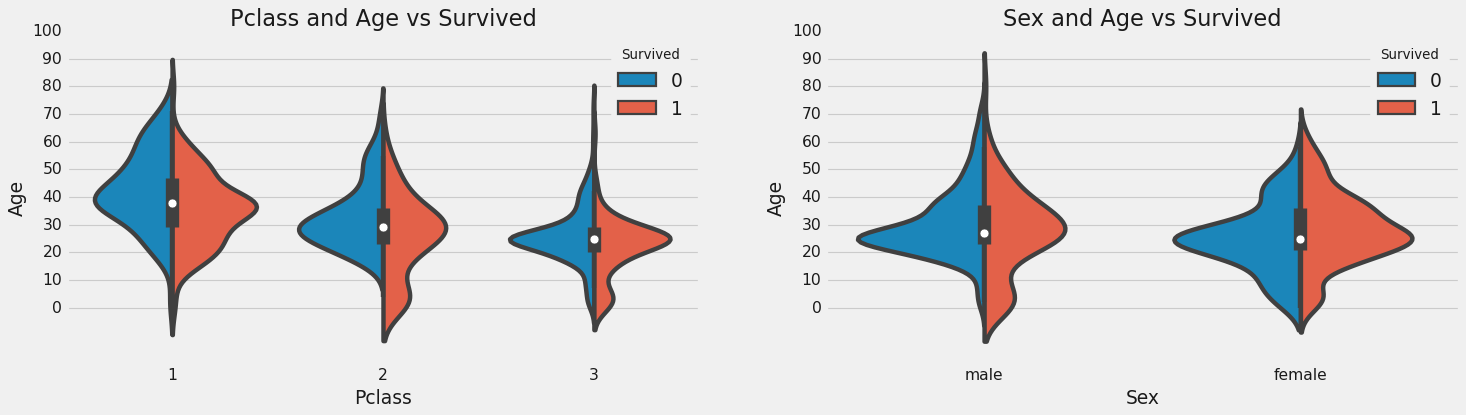

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.violinplot("Pclass","Age", hue="Survived", data=titanic_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
#plt.savefig("violinplot.png")
plt.show()

In [39]:
print('Oldest Passenger was of:',titanic_df['Age'].max(),'Years')
print('Youngest Passenger was of:',titanic_df['Age'].min(),'Years')
print('Average Age on the ship:',titanic_df['Age'].mean(),'Years')

Oldest Passenger was of: 80 Years
Youngest Passenger was of: 0 Years
Average Age on the ship: 29.19010123734533 Years


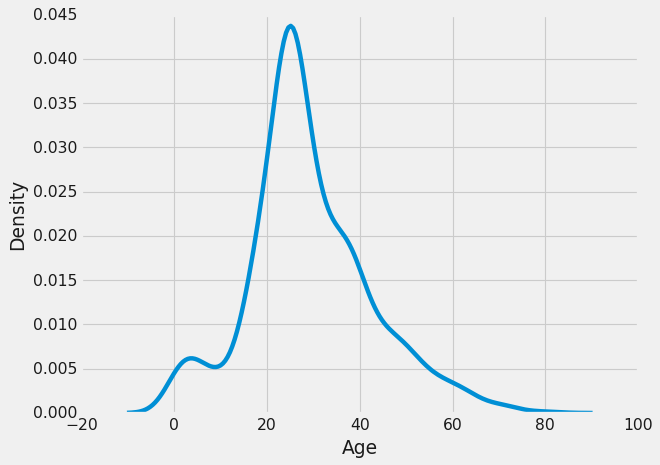

In [40]:
sns.distplot(titanic_df.Age, hist = False )

In [41]:
titanic_df_dummied = pd.get_dummies(titanic_df, columns=["Sex"])

In [42]:
titanic_df_dummied = pd.get_dummies(titanic_df_dummied, columns = ["Embarked"])

In [43]:
titanic_df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22,1,0,7.2500,0,1,0,0,1
2,1,1,38,1,0,71.2833,1,0,1,0,0
3,1,3,26,0,0,7.9250,1,0,0,0,1
4,1,1,35,1,0,53.1000,1,0,0,0,1
5,0,3,35,0,0,8.0500,0,1,0,0,1


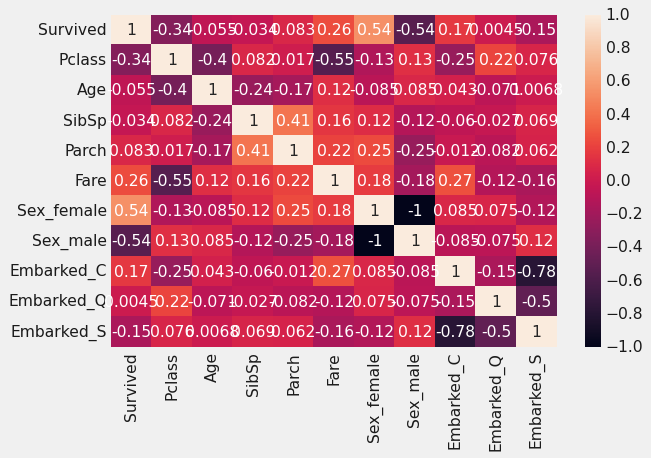

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic_df_dummied.corr(), annot = True) 

**Positive Correlation Features:**

Fare and Survived: 0.26.
There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.

**Negative Correlation Features:**

Fare and Pclass: -0.55
This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).
Gender and Survived: -0.54
Basically is the info of whether the passenger was male or female.
Pclass and Survived: -0.34

In [45]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = titanic_df_dummied[used_features]
y = titanic_df_dummied['Survived']

In [46]:
titanic_test_df = pd.read_csv('C:\\Users\\Workstation\\OneDrive\\Desktop\Data Science_Material\\Data Science with Python\\Kaggle Competitions\\Titanic\\test.csv',index_col = 0)

In [47]:
titanic_test_df = titanic_test_df.drop(['Name','Ticket','Cabin'], axis=1)

In [48]:
titanic_test_df.shape

(418, 7)

In [52]:
def age_approx(cols):
    Age    = cols[3]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return int(titanic_test_df[titanic_test_df['Pclass']== 1]['Age'].mean())
        elif Pclass == 2:
            return int(titanic_test_df[titanic_test_df['Pclass']== 2]['Age'].mean())
        else:
            return int(titanic_test_df[titanic_test_df['Pclass']== 3]['Age'].mean())
    else:
        return Age
    
    
titanic_test_df['Age'] = titanic_test_df.apply(age_approx, axis=1)
titanic_test_df['Age'] = titanic_test_df['Age'].astype(int)

In [53]:
titanic_test_df['Age'] = titanic_test_df.apply(age_approx, axis=1)
titanic_test_df['Age'] = titanic_test_df['Age'].astype(int)

In [55]:
titanic_test_df.dropna(inplace=True)
titanic_test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [56]:
titanic_test_dummied = pd.get_dummies(titanic_test_df, columns=["Sex"])

In [57]:
test_df1 = pd.get_dummies(titanic_test_dummied,columns=["Embarked"])
test_df1.shape

(417, 10)

In [58]:
test_df1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,0,0,0,7.8292,0,1,0,1,0
893,3,1,1,0,7.0000,1,0,0,0,1
894,2,0,0,0,9.6875,0,1,0,1,0
895,3,0,0,0,8.6625,0,1,0,0,1
896,3,1,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,0,0,0,8.0500,0,1,0,0,1
1306,1,0,0,0,108.9000,1,0,1,0,0
1307,3,0,0,0,7.2500,0,1,0,0,1


In [59]:
X.columns, test_df1.columns

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype='object'))

In [60]:
X.shape[1], test_df1.shape[1]

(10, 10)

In [61]:
# Split dataset in training and test datasets
# X_train, X_test = train_test_split(df_train, test_size=0.5, random_state=int(time.time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 10)
(267, 10)
(622,)
(267,)


In [63]:
LogReg = LogisticRegression()

In [64]:
LogReg.fit(X_train, y_train)
print(LogReg.coef_)
print(LogReg.intercept_)

[[-0.99562246 -0.03482432 -0.26426737 -0.185141    0.00443593  1.99351361
  -0.33249171  0.82983539  0.55187607  0.27931043]]
[1.87771811]


In [65]:
pred = LogReg.predict(test_df1)

In [66]:
pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,

In [67]:
predict = pd.DataFrame(pred)

In [68]:
predict.to_csv('predict.csv', index= False)

In [69]:
pd.read_csv('predict.csv')

,0
0,0
1,1
2,1
3,0
4,1
...,...
412,0
413,1
414,0
415,0


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       161
           1       0.80      0.78      0.79       106

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.83      0.84      0.83       267



With Accuracy 83%, we have predicted whether the passenger would survuve or not !!